In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    

In [69]:
df = pd.read_csv('height-weight.csv')

In [70]:
df.sample(5)

,Weight,Height
20,45,129
0,45,120
9,78,170
8,95,182
10,82,176


Text(0, 0.5, 'Y')

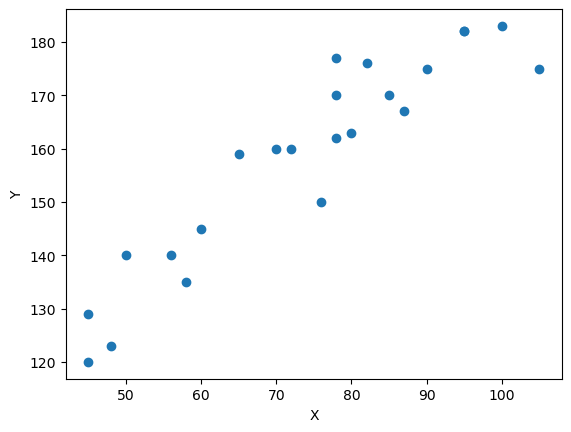

In [71]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("X")
plt.ylabel("Y")

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [73]:
df.describe()


,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [74]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [75]:
## divide into dependent and independent

In [76]:
X = df[['Weight']]
Y= df['Height']

In [77]:
X.shape,Y.shape

((23, 1), (23,))

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train , Y_test = train_test_split(X,Y , test_size=0.2 , random_state = 42)


In [91]:
X_train.shape

(18, 1)

In [92]:
Y_train.shape

(18,)

In [93]:
X_test

,Weight
15,78
9,78
0,45
8,95
17,65


In [99]:
from sklearn.preprocessing import StandardScaler


In [100]:
scaler = StandardScaler()

In [101]:
X_train_scaled =scaler.fit(X_train)

In [103]:
X_test_scaled = scaler.transform(X_test)

In [104]:
X_test_scaled

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

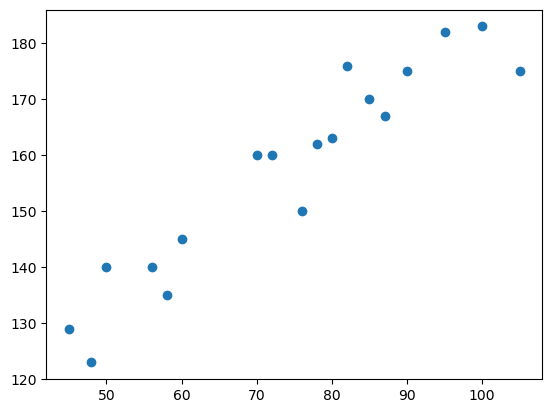

In [106]:
plt.scatter(X_train, Y_train)

In [107]:
scaler.transform([[80]])

C:\Users\solan\anaconda1\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [108]:
##model training 


In [111]:
from sklearn.linear_model import LinearRegression


In [112]:
regressor = LinearRegression()

In [118]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [119]:
regressor.intercept_

85.96709053063559

In [120]:
regressor.coef_

array([0.9630459])

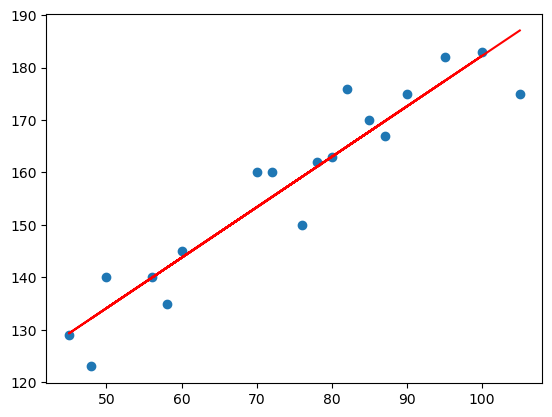

In [125]:
plt.scatter(X_train , Y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

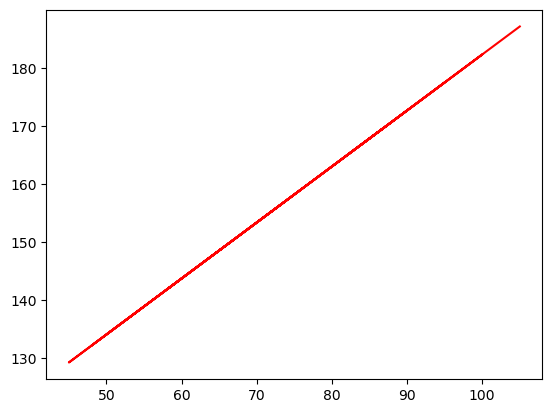

In [150]:
plt.plot(X_train , regressor.predict(X_train) ,'r')

In [151]:
y_pred_test =regressor.predict(X_test)

In [152]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [153]:
Y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

# Performance Metrics MAE,MSE,RMSE

In [154]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [133]:
mse=mean_squared_error(Y_test,y_pred_test
                      )

In [134]:
mae= mean_absolute_error(Y_test , y_pred_test)

In [135]:
rmse =np.sqrt(mse)

In [136]:
print("mse is ", mse)
print("mae is ", mae)
print("rmse is ", rmse)


mse is  109.77592599051658
mae is  9.822657814519232
rmse is  10.477400726827078


In [137]:
from sklearn.metrics import r2_score

In [138]:
score = r2_score(Y_test, y_pred_test)

In [139]:
score

0.776986986042344

In [140]:
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7026493147231252

In [141]:
scaler

StandardScaler()

In [142]:
regressor

LinearRegression()

In [159]:
from sklearn.metrics import accuracy_score

In [163]:
acc = accuracy_score(Y_test, y_pred_test)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [161]:
threshold = 0.5  # Example threshold for binary classification
y_pred_categorical = [1 if pred >= threshold else 0 for pred in y_pred_test]

# Now both y_pred_categorical and Y_test should be arrays/lists of integers
# representing class labels, and you can calculate accuracy_score safely.
accuracy = accuracy_score(Y_test, y_pred_categorical)

In [162]:
accuracy

0.0

# mulitple Regression model

In [168]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [169]:
df = fetch_california_housing()

In [194]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [173]:
df.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [190]:
df.target_names

['MedHouseVal']

In [176]:
datas = pd.DataFrame(df.data,columns=df.feature_names)

In [186]:
df1 = datas.copy()

In [187]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [196]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [197]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [198]:
df1['Price'] = df.target

In [200]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [201]:
df1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [203]:
df1.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [204]:
df1.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [205]:
df1.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

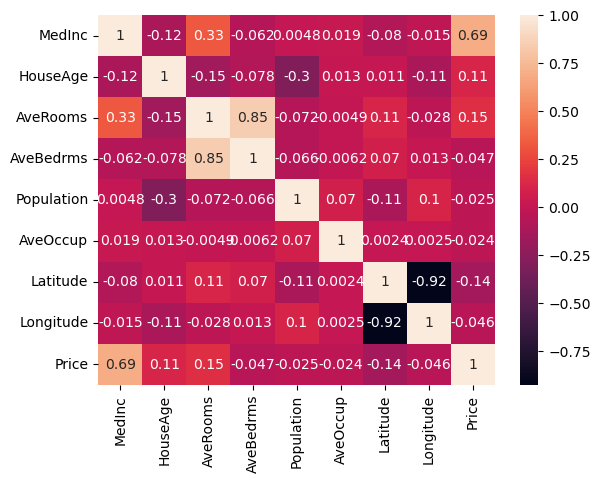

In [206]:
sns.heatmap(df1.corr(), annot=True)

In [220]:
X = df1.iloc[:,:-1]
Y = df1.iloc[:,-1]

In [252]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train , Y_test =train_test_split(X,Y , random_state=10,test_size=0.33)


In [253]:
X_train.shape

(13828, 8)

In [254]:
from sklearn.preprocessing import StandardScaler


In [255]:
scaler =StandardScaler()

In [256]:
X_train_scaled = scaler.fit(X_train)


In [257]:
X_train_scaled =scaler.transform(X_train)

In [258]:
X_test_scaled =scaler.transform(X_test)

In [259]:
X_train_scaled

array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
         0.96929441, -1.43979718],
       [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
        -0.75823526,  1.08204942],
       [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
         0.94594941, -1.2454256 ],
       ...,
       [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
         0.78720344, -1.10587678],
       [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
        -0.77224225,  0.66838683],
       [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
         0.77786545, -1.15073176]])

In [260]:
X_test_scaled

array([[ 0.75154854, -1.31428337, -0.39376169, ...,  0.12606697,
        -0.68820027,  0.19491761],
       [ 0.05935857, -0.12595418, -0.33070668, ..., -0.12021013,
         0.89459042, -1.36503888],
       [ 0.34405687, -1.31428337, -0.41007104, ..., -0.15581759,
        -0.91698123,  0.89764561],
       ...,
       [ 0.36483158,  0.27015554,  0.04216837, ..., -0.08014641,
        -0.46875731, -0.43803598],
       [-0.90412152, -0.91817364,  0.66736933, ..., -0.10263685,
         2.51006411, -1.96808915],
       [-0.43377577,  1.22081889, -0.44835491, ...,  0.2807072 ,
        -0.74422826,  0.69330627]])

In [261]:
#model triaing

In [262]:
from sklearn.linear_model import LinearRegression


In [263]:
regression =LinearRegression()

In [264]:
regression

LinearRegression()

In [265]:
regression.fit(X_train_scaled, Y_train)

LinearRegression()

In [270]:
regression.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [271]:
regression.intercept_

2.0634768086491184

In [272]:
y_pred_test1 = regression.predict(X_test_scaled)

In [273]:
y_pred_test1

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

In [274]:
# perfromance metrics


In [275]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


In [276]:
mse1 = mean_squared_error(Y_test, y_pred_test1)

In [277]:
mae1 =mean_absolute_error(Y_test , y_pred_test1)

In [278]:
rmse1 = np.sqrt(mse1)

In [280]:
print("mse1 is :" , mse1)
print("mae1 is :" , mae1)
print("rmse1 is :" , rmse1)


mse1 is : 0.5522332399363616
mae1 is : 0.5371056943007961
rmse1 is : 0.7431239734636218


In [281]:
# rscore and adj rscore

In [289]:
from sklearn.metrics import r2_score

In [291]:
score = r2_score(Y_test , y_pred_test1 )

In [292]:
print(score)

0.5935958526436641


In [294]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.5931179409607521